In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("C:\MyWork\MyLearning\Career Growth\ML\Files\DataSet\Google_Stock_Price_Train.csv")

data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
training_set = data.iloc[:,1:2].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))

trainig_data_scaled = sc.fit_transform(training_set)

In [5]:
import numpy as np


# Prepare Input data(Time Series) for LSTM
X_train = []
y_train = []

for i in range(60,1258):
    X_train.append(trainig_data_scaled[i-60:i,0])
    y_train.append(trainig_data_scaled[i,0])
    
X_train,y_train = np.array(X_train),np.array(y_train)

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [6]:
X_train.shape

(1198, 60, 1)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [8]:
# Its kind of Regressor problem predicting continues number
# Initialize the RNN

model = Sequential()

In [9]:
# Adding the First LSTM Layer and Dropout Regularization 
model.add(LSTM(units=50,return_sequences=True,input_shape=(60,1)))
model.add(Dropout(0.2))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
# Adding the Second LSTM Layer and Dropout Regularization 
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

In [11]:
# Adding the Third LSTM Layer and Dropout Regularization 
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

In [12]:
# Adding the Forth LSTM Layer and Dropout Regularization 
model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [13]:
# Add output layer
model.add(Dense(units=1))

In [14]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [15]:
model.fit(X_train,y_train,epochs=100,batch_size=32,verbose=0)

In [ ]:
data_test = pd.read_csv("C:\MyWork\MyLearning\Career Growth\ML\Files\DataSet\Google_Stock_Price_Test.csv")

In [16]:
trainig_data_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [18]:
predicted = model.predict(X_train)

In [20]:
predicted.shape

(1198, 1)

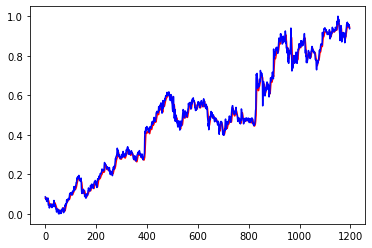

In [38]:
import matplotlib.pyplot as plt

plt.plot(predicted,color='red')
plt.plot(y_train.reshape(-1,1),color='b')